<a href="https://colab.research.google.com/github/Nibha-Venkappa-Rai/majorproject/blob/main/Sentimental_Analysis_On_Wine_Review_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentimental Analysis On Wine Review Dataset**

**We are going to analyze the Wine Review Dataset dataset which contains text reviews written by customers and predict whether the review is positive or not.**

**Directories Used**:

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import re

import string

from nltk.corpus import stopwords

import nltk

from nltk.stem.snowball import SnowballStemmer, PorterStemmer

nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **1. Loading and analysis of Wine Review dataset**

In [ ]:
#Importing and inspecting our dataset:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/SmartknowerML/Machine Learning/wine first 150k.csv') 
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [ ]:
#Renamed the unnamed column to UniqueId
df.rename(columns={'Unnamed: 0':'UniqueID'},inplace=True)
df.head(10)

,UniqueID,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [ ]:
df.columns

Index(['UniqueID', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [ ]:
df.shape

(150930, 11)

In [ ]:
df['description'][0]

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'

In [ ]:
df['points'][0]

96

In [ ]:
df['description'][1557]

'Aromas of buttered noodles and honey fail to hold up in the glass. This sweet Macabeo feels a bit watery, with no complexity to the palate structure. Flavors of honey and vanilla are slightly bitter.'

In [ ]:
df['points'][1557]

84

In [ ]:
#Checks whether there are any NULL values
print(df.isnull().values.any())

True


In [ ]:
#dropping NaN values
df.dropna(axis=0, inplace=True)

In [ ]:
#Removing useless columns other than 'description' and 'points'
df.drop(['UniqueID', 'country',  'designation', 
       'price', 'province', 'region_1', 'region_2', 
        'variety', 'winery'],axis =1,inplace=True)

In [ ]:
df.shape

(39241, 2)

In [ ]:
#Displays first 10 rows of the data set
df.head(10)

,description,points
0,This tremendous 100% varietal wine hails from ...,96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
8,This re-named vineyard was formerly bottled as...,95
9,The producer sources from two blocks of the vi...,95
11,"From 18-year-old vines, this supple well-balan...",95
12,A standout even in this terrific lineup of 201...,95
14,"With its sophisticated mix of mineral, acid an...",95
15,"First made in 2006, this succulent luscious Ch...",95
16,"This blockbuster, powerhouse of a wine suggest...",95


In [ ]:
df.columns

Index(['description', 'points'], dtype='object')

In [ ]:
#Series containing counts of unique values of points ranging from 80 to 100.
df['points'].value_counts()


87     4917
90     4362
88     4141
86     3305
92     3269
89     2969
91     2968
85     2681
84     2550
93     2278
83     1462
94     1434
82     1211
95      704
81      326
96      267
80      214
97      124
98       38
99       13
100       8
Name: points, dtype: int64

In [ ]:
#Points greater than or equal to 92 are considered to be 'Positive'
#Points ranging from 86 to 91 are considered to be 'Neutral'
#Points less than or equal to 85 are considered to be 'Negeative'
def partition(x):
  if x >=92:
    return('Positive')
  elif x>=86 and x<92:
    return('Neutral')
  else:
      return('Negative')

score_upd=df['points']

t=score_upd.map(partition)
df['points']=t

In [ ]:
#We will remove all points that are equal to 'Neutral' as they do not provide us any useful information for prediiction and analysis.
df=df[df['points']!='Neutral']

In [ ]:
df.shape

(16579, 2)

In [ ]:
df.head(10)

,description,points
0,This tremendous 100% varietal wine hails from ...,Positive
2,Mac Watson honors the memory of a wine once ma...,Positive
3,"This spent 20 months in 30% new French oak, an...",Positive
8,This re-named vineyard was formerly bottled as...,Positive
9,The producer sources from two blocks of the vi...,Positive
11,"From 18-year-old vines, this supple well-balan...",Positive
12,A standout even in this terrific lineup of 201...,Positive
14,"With its sophisticated mix of mineral, acid an...",Positive
15,"First made in 2006, this succulent luscious Ch...",Positive
16,"This blockbuster, powerhouse of a wine suggest...",Positive


In [ ]:
#Series containing counts of unique values of ratings('Positive' and 'Negeative').
df['points'].value_counts()

Negative    8444
Positive    8135
Name: points, dtype: int64

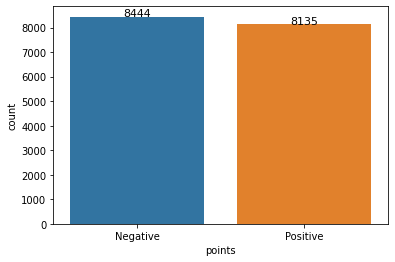

In [ ]:
#Visualising the count of different ratings using a graph
#Visualisation for df['Rating'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt
graph= sns.countplot(x=df["points"],  data=df, order = df["points"].value_counts().index)
s=df["points"].value_counts().index
i=0
for p in graph.patches:#All rectangles are patches, so there are 2 patches
  height=p.get_height()
  width=p.get_width()
  graph.text(p.get_x()+width/2,height+20,height,ha='center',fontsize=11)
  i=i+1
plt.show()

**2. Visualising the data using WordCloud**

(-0.5, 1499.5, 749.5, -0.5)

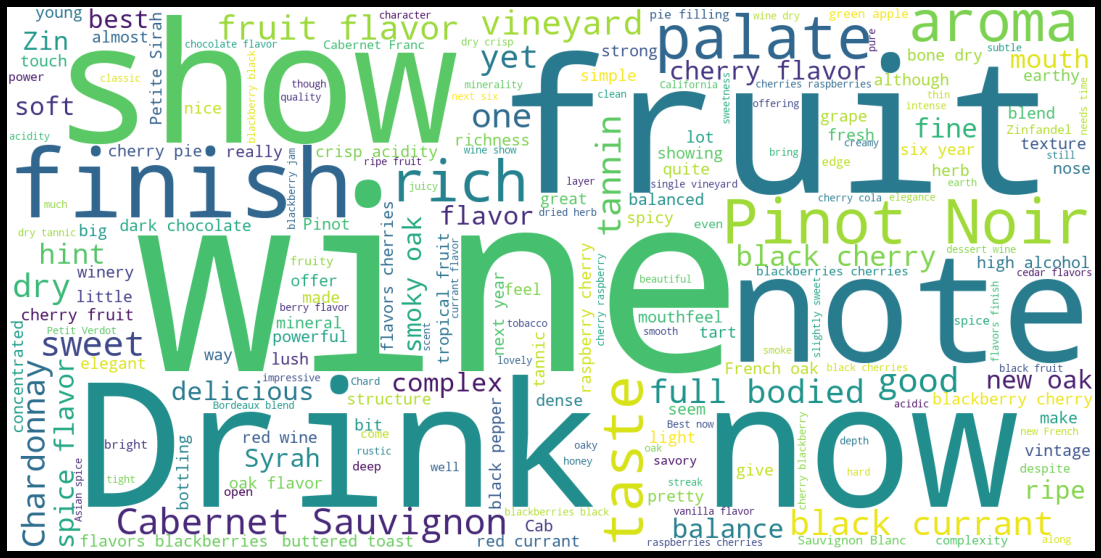

In [ ]:
#Visual analysis of data using WordCloud for Review Text of df_rating12
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1500, height=750).generate(' '.join(df['description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
#Grouping the positive points as df_ratingPos
mask = (df["points"] == 'Positive')
df_ratingPos = df[mask]
#Grouping the negeative points as df_ratingNeg
mask = (df["points"] == 'Negative')
df_ratingNeg = df[mask]

(-0.5, 1499.5, 749.5, -0.5)

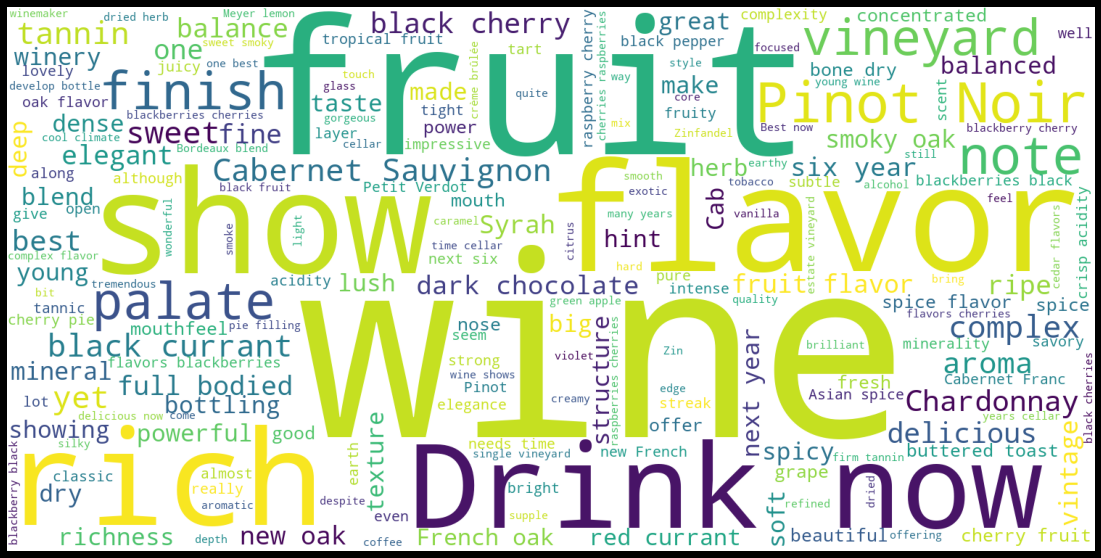

In [ ]:
#Visual analysis of data using WordCloud for Review Text of df_ratingPos
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1500, height=750).generate(' '.join(df_ratingPos['description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1499.5, 749.5, -0.5)

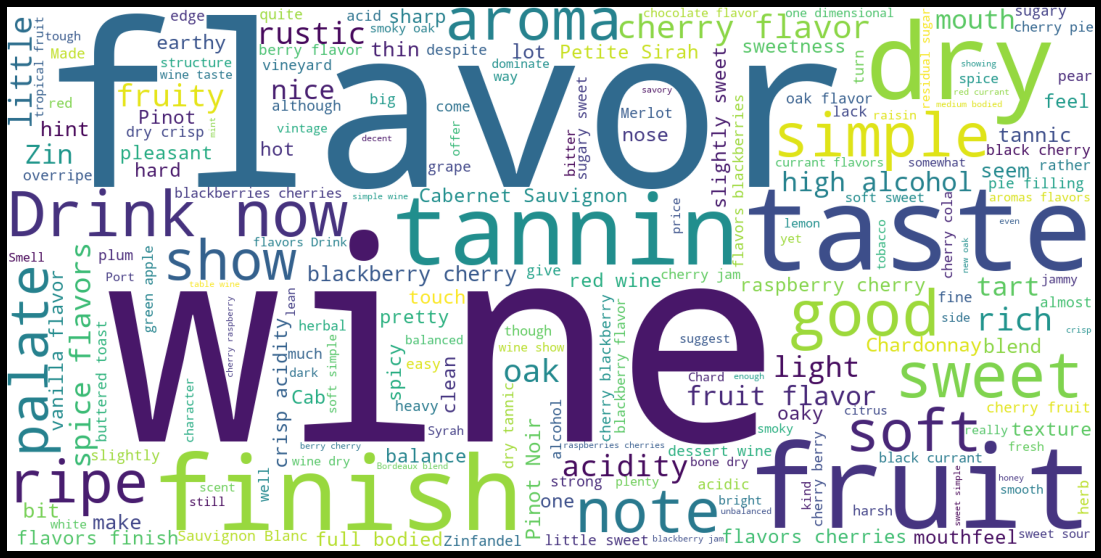

In [ ]:
#Visual analysis of data using WordCloud for Review Text of df_ratingNeg
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1500, height=750).generate(' '.join(df_ratingNeg['description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

**3. Data Preprocessing Using Stemming**

In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

ps= nltk.PorterStemmer()
snow = nltk.stem.SnowballStemmer('english')

#Cleaning up the data
def clean_text(text):
  text_nopunct= "".join([char for char in text if char not in string.punctuation]) #Removes punctuation
  tokens=re.split('\W+',text_nopunct) #Tokenisation
  text_nostop=[word for word in tokens if word not in stopwords.words('english')] #Removes stopwords
  snow = nltk.stem.SnowballStemmer('english') #Using SnowballStemmer  (it was obsereved to be better than Porter Stemming)
  text_stemmed=[snow.stem(word) for word in text_nostop] # stemming the word
  joined_words = ( " ".join(text_stemmed)) #join the words in a list into a single string.
  return joined_words

df['description']=df['description'].apply(lambda x: clean_text(x))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,points
0,this tremend 100 variet wine hail oakvill age ...,Positive
2,mac watson honor memori wine made mother treme...,Positive
3,this spent 20 month 30 new french oak incorpor...,Positive
8,this renam vineyard former bottl delancellotti...,Positive
9,the produc sourc two block vineyard wine one h...,Positive
11,from 18yearold vine suppl wellbalanc effort bl...,Positive
12,a standout even terrif lineup 2015 releas patr...,Positive
14,with sophist mix miner acid tart fruit seduct ...,Positive
15,first made 2006 succul luscious chardonnay min...,Positive
16,this blockbust powerhous wine suggest blueberr...,Positive


**4. Training and Testing**

In [ ]:
x = df.iloc[:,0].values #Description[Review Text] column as input
y = df.iloc[:,1].values #Points column as output


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(13263,)

In [ ]:
x_test.shape

(3316,)

**5. Using TDFIF Vectorization and Naive Bayers Model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#Syntax of pipeline
#Pipeline([('Variable1',Method1()),('Variable2',Method2())])

In [ ]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [ ]:
text_model.fit(x_train,y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**6. Predictions**

In [ ]:
y_pred = text_model.predict(x_test)
y_pred

array(['Negative', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Positive'], dtype='<U8')

**7. Acuracy Score and Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9638118214716526

In [ ]:
confusion_matrix(y_pred,y_test)

array([[1592,   37],
       [  83, 1604]])

**8. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.98      0.95      0.96      1675
    Positive       0.95      0.98      0.96      1641

    accuracy                           0.96      3316
   macro avg       0.96      0.96      0.96      3316
weighted avg       0.96      0.96      0.96      3316



In [ ]:
df.head

<bound method NDFrame.head of                                               description    points
0       this tremend 100 variet wine hail oakvill age ...  Positive
2       mac watson honor memori wine made mother treme...  Positive
3       this spent 20 month 30 new french oak incorpor...  Positive
8       this renam vineyard former bottl delancellotti...  Positive
9       the produc sourc two block vineyard wine one h...  Positive
...                                                   ...       ...
150889  a bizarr style wine the aroma portlik old port...  Negative
150892  a light earthi wine violet berri tea flavor sh...  Negative
150914  oldgold color thick syrupi the aroma run caram...  Positive
150915  decad ago bering thenwinemak myron nightingal ...  Positive
150916  an impress wine present full bouquet breadi le...  Positive

[16579 rows x 2 columns]>

**9. Demonstration**

In [ ]:
while(True):  
  Customer_Review=input("Please enter your Review: ")
  output=text_model.predict([Customer_Review])
  print(output)
  reply=input("Enter Y to continue and N to exit:")
  reply=reply.upper()
  if(reply=='N'):
    break

Please enter your Review: The lively mousse carries this sophisticated wine, which is the perfect partner to the Comtes de Champagne Blanc de Blancs. Everything is in its place, well integrated and with great precision. This trends to the sweeter side of Brut but with bottle age this has brought fine secondary flavors that are ripe and rich. The wine will age further, drink until 2020.
['Positive']
Enter Y to continue and N to exit:Y
Please enter your Review: The texture's all wrong on this wine, because the ripeness levels and tannins are unbalanced. The cherry and wood flavors have streaks of green and jalapeÃ±o pepper, and there's some funkiness.
['Negative']
Enter Y to continue and N to exit:N


**9. Deployment using Streamlit**

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app1.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('/content/drive/My Drive/SmartknowerML/Machine Learning/wine first 150k.csv') 
df.rename(columns={'Unnamed: 0':'UniqueID'},inplace=True)
df.dropna(axis=0, inplace=True)
df.drop(['UniqueID', 'country',  'designation', 
       'price', 'province', 'region_1', 'region_2', 
        'variety', 'winery'],axis =1,inplace=True)
def partition(x):
  if x >=92:
    return('Positive')
  elif x>=86 and x<92:
    return('Neutral')
  else:
      return('Negative')

score_upd=df['points']

t=score_upd.map(partition)
df['points']=t
df=df[df['points']!='Neutral']

x = df.iloc[:,0].values #Description[Review Text] column as input
y = df.iloc[:,1].values #Points column as output


st.title("Wine Review Classifier")
st.subheader('TFIFD Vectorizer')
st.write('This project is based on Naive Bayes Classifier')


text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
text_model.fit(x,y)
message = st.text_area("Please enter your Review Text","Type Here ..")
op = text_model.predict([message])
if st.button("Predict"):
  st.title(op)

Overwriting app1.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port='8501')
url

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Support for "return_ngrok_tunnel" as "False" is deprecated and will be removed in 5.0.0, when this method will return a NgrokTunnel instead of a str
  


'http://bf43f7dae3ad.ngrok.io'

In [ ]:
!streamlit run app1.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.229.138.58:8501

2020-10-22 15:34:58.472 NumExpr defaulting to 2 threads.
  Stopping...
  Stopping...


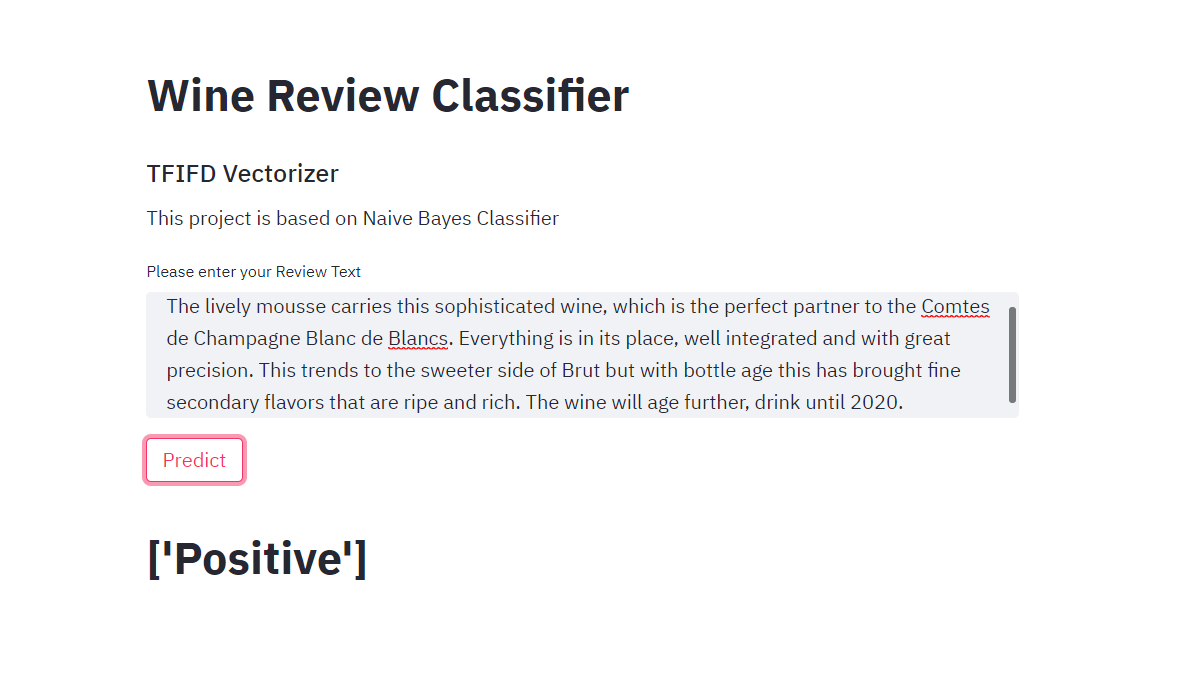

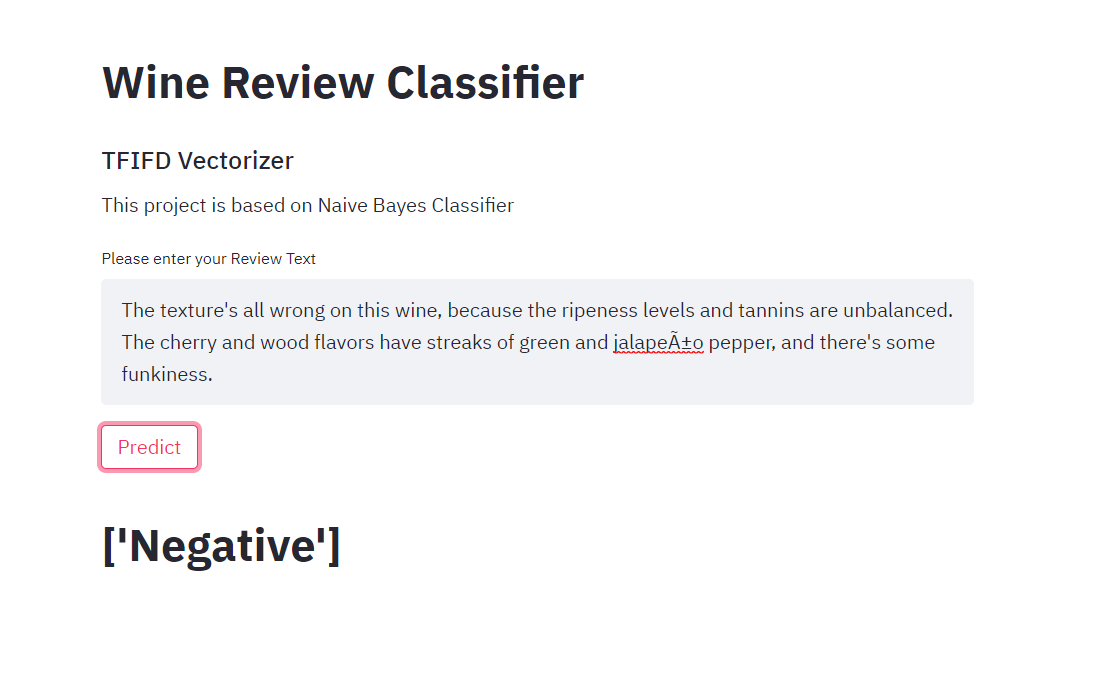